In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\iefim\AppData\Local\Temp\ipykernel_15208\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


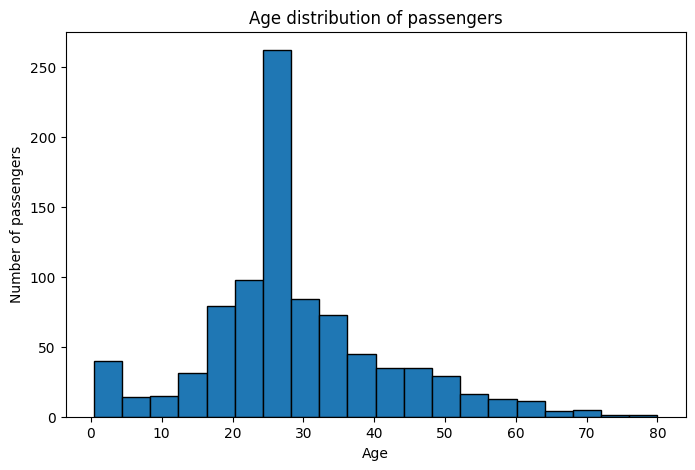

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

In [9]:
for gender, data in [('male', df_male), ('female', df_female)]:
    age = data['Age'].dropna()
    print(f"--- {gender.capitalize()} ---")
    print("Min:", age.min())
    print("Max:", age.max())
    print("Mean:", age.mean())
    print("Mode:", age.mode().values)
    print("Median:", age.median())
    print()

--- Male ---
Min: 0.42
Max: 80.0
Mean: 30.72664459161148
Mode: [19. 25. 28.]
Median: 29.0

--- Female ---
Min: 0.75
Max: 63.0
Mean: 27.915708812260537
Mode: [24.]
Median: 27.0



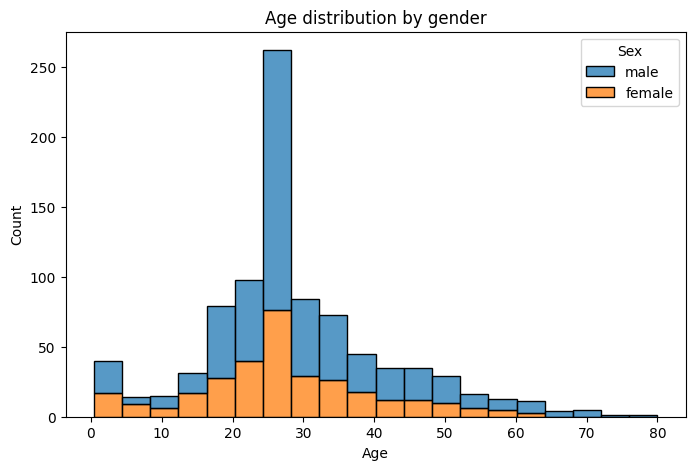

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df, x='Age', hue='Sex', multiple='stack', bins=20)
plt.title('Age distribution by gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\iefim\AppData\Local\Temp\ipykernel_15208\3464917967.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, color='gray', label='All passengers', alpha=0.3)
C:\Users\iefim\AppData\Local\Temp\ipykernel_15208\3464917967.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_male['Age'], shade=True, color='blue', label='Male', alpha=0.4)
C:\Users\iefim\AppData\Local\Temp\ipykernel_15208\3464917967.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_female['Age'], shade=True, color='red', label='Female', alpha=0.4)


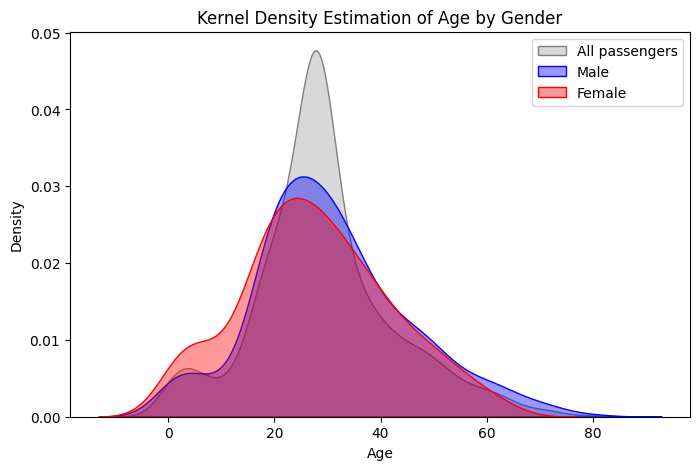

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Age'], shade=True, color='gray', label='All passengers', alpha=0.3)
sns.kdeplot(df_male['Age'], shade=True, color='blue', label='Male', alpha=0.4)
sns.kdeplot(df_female['Age'], shade=True, color='red', label='Female', alpha=0.4)

plt.title('Kernel Density Estimation of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


<Figure size 800x500 with 0 Axes>

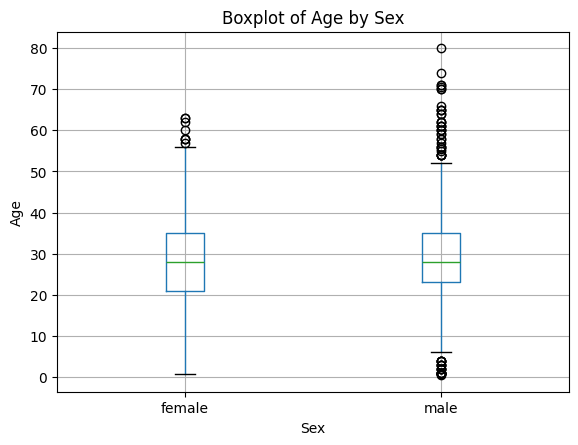

In [12]:
plt.figure(figsize=(8,5))
df.boxplot(column='Age', by='Sex')
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.suptitle('')
plt.show()
